https://keras.io/getting_started/
Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

# Import Keras library for CNN

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
# Step 1 - Convolution
# Step 2 - Pooling
# Step 3 - Flattening
# Step 4 - Full connection
# Compiling the CNN

In [19]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

In [20]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory('D:/2022-2023/Python Project/dogcat_new/dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('D:/2022-2023/Python Project/dogcat_new/dataset',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 315 images belonging to 2 classes.
Found 315 images belonging to 2 classes.


# Train the CNN model

In [22]:
model = classifier.fit_generator(training_set,
                         steps_per_epoch = 8,
                         epochs = 10,
                         validation_data = test_set,    
                         validation_steps = 2000)
classifier.summary()


Epoch 1/10


C:\Users\hp\AppData\Local\Temp\ipykernel_32720\4123376074.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model = classifier.fit_generator(training_set,


8/8 [==============================] - 2s 200ms/step - loss: 1.3133 - accuracy: 0.7649 - val_loss: 0.7314 - val_accuracy: 0.4635
Epoch 2/10
8/8 [==============================] - 1s 98ms/step - loss: 0.5762 - accuracy: 0.8086
Epoch 3/10
8/8 [==============================] - 1s 112ms/step - loss: 0.3772 - accuracy: 0.8606
Epoch 4/10
8/8 [==============================] - 1s 107ms/step - loss: 0.3530 - accuracy: 0.8645
Epoch 5/10
8/8 [==============================] - 1s 101ms/step - loss: 0.2985 - accuracy: 0.8606
Epoch 6/10
8/8 [==============================] - 1s 94ms/step - loss: 0.2809 - accuracy: 0.8633
Epoch 7/10
8/8 [==============================] - 1s 117ms/step - loss: 0.2618 - accuracy: 0.8725
Epoch 8/10
8/8 [==============================] - 1s 90ms/step - loss: 0.2495 - accuracy: 0.8924
Epoch 9/10
8/8 [==============================] - 1s 100ms/step - loss: 0.2259 - accuracy: 0.8867
Epoch 10/10
8/8 [==============================] - 1s 118ms/step - loss: 0.2115 - accuracy

# Save the model

In [6]:
classifier.save("fruitmodel.h5")
print("Saved model to disk")

Saved model to disk


# Part 3 - Making new predictions

In [7]:
# Part 3 - Making new predictions

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('D:/2022-2023/Python Project/dogcat_new/bananna.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Apple'
    print(prediction)
else:
    prediction = 'Banana'
    print(prediction)

1/1 [==============================] - 0s 125ms/step
Banana


# Part 3 - Another way Making new predictions

1/1 [==============================] - 0s 47ms/step


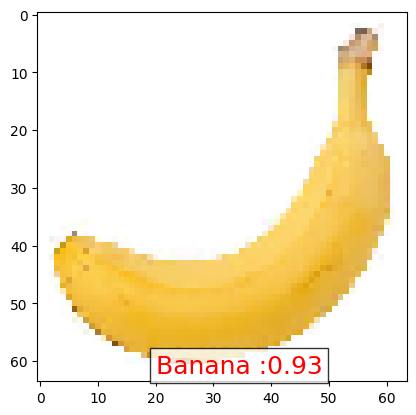

In [23]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('D:/2022-2023/Python Project/dogcat_new/bananna.jpg', target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Apple :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Banana :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [9]:
import pandas as pd
test_set.reset
ytesthat = classifier.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

C:\Users\hp\AppData\Local\Temp\ipykernel_32720\2066635799.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = classifier.predict_generator(test_set)


In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

,filename,predict,y,y_pred
0,Apple\Golden-Delicious_002.jpg,0.05543,0,0
1,Apple\Golden-Delicious_003.jpg,0.00163,0,0
2,Apple\Golden-Delicious_004.jpg,0.00062,0,0
3,Apple\Golden-Delicious_005.jpg,0.31707,0,0
4,Apple\Golden-Delicious_006.jpg,0.02286,0,0
5,Apple\Golden-Delicious_007.jpg,0.00249,0,0
6,Apple\Golden-Delicious_008.jpg,0.06059,0,0
7,Apple\Golden-Delicious_009.jpg,0.04871,0,0
8,Apple\Golden-Delicious_010.jpg,0.08841,0,0
9,Apple\Golden-Delicious_011.jpg,0.00040,0,0


In [11]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 5000 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 5000 Validation images : 44


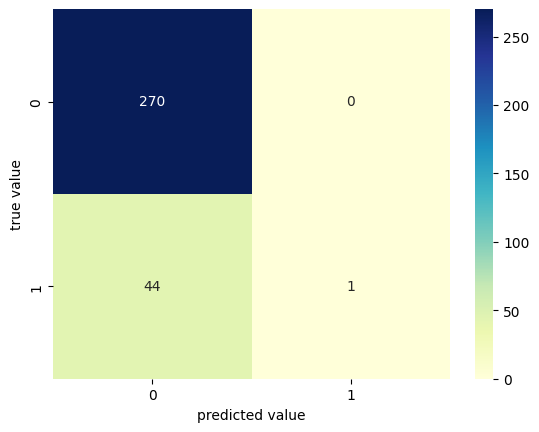

In [12]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');